<a href="https://colab.research.google.com/github/krishnadixit05/Google-Colab/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###LAb-3

In [ ]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
col_names = ['area', 'room', 'price']
dataset=pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/master/ex1data2.txt")

In [ ]:
dataset.describe()

,2104,3,399900
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


In [ ]:
area=dataset.iloc[:,0:1]
rooms=dataset.iloc[:,1:2]
price=dataset.iloc[:,2:3]

In [ ]:
#Feature Normalization
def feature_normalization(X):
  mean=np.mean(X,axis=0)
  std=np.std(X,axis=0)
  x_norm=(X-mean)/ std

  return x_norm,mean,std

In [ ]:
data_norm=dataset.values
m=len(data_norm[:,0])

In [ ]:
x_in=data_norm[:,0:2].reshape(m,2)
X2,mean_X2,std_X2=feature_normalization(x_in)
X2

array([[-5.01457678e-01, -2.28664780e-01],
       [ 5.05397546e-01, -2.28664780e-01],
       [-7.33034380e-01, -1.54348727e+00],
       [ 1.26053896e+00,  1.08615771e+00],
       [-1.69086013e-02,  1.08615771e+00],
       [-5.84523234e-01, -2.28664780e-01],
       [-7.19190120e-01, -2.28664780e-01],
       [-7.78342865e-01, -2.28664780e-01],
       [-6.34865995e-01, -2.28664780e-01],
       [-7.35442077e-02,  1.08615771e+00],
       [ 1.96993413e-03, -2.28664780e-01],
       [-1.36472659e-01, -2.28664780e-01],
       [ 3.12070399e+00,  2.40098019e+00],
       [-9.19302596e-01, -2.28664780e-01],
       [ 3.79540643e-01,  1.08615771e+00],
       [-8.53857006e-01, -1.54348727e+00],
       [-9.59576805e-01, -2.28664780e-01],
       [ 7.68438474e-01,  1.08615771e+00],
       [ 1.29955460e+00,  1.08615771e+00],
       [-2.91276650e-01, -2.28664780e-01],
       [-1.38989797e-01, -1.54348727e+00],
       [-4.96423402e-01, -2.28664780e-01],
       [-4.58556890e-02,  1.08615771e+00],
       [ 2.

In [ ]:
Y2=data_norm[:,2:3]

In [ ]:
#ML Model
def hypothesis(theta_array,x1,x2):
  return (theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2)

In [ ]:
def costfunction(theta_array,x1,x2,y,m):
  total_cost = 0
  for i in range(m):
    total_cost+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])**2
  return total_cost/(2*m)

In [ ]:
def gradient_descent(theta_array,x1,x2,y,m,alpha):
  summation_0=0
  summation_1=0
  summation_2=0
  for i in range(m):
    summation_0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])
    summation_1+=((theta_array[0]+(theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])*x1[i])
    summation_2+=((theta_array[0]+(theta_array[1]*x1[i]+theta_array[2]*x2[i])-y[i])*x2[i])


  new_theta0=theta_array[0] -(summation_0*alpha/m)
  new_theta1=theta_array[1] -(summation_1*alpha/m)
  new_theta2=theta_array[2] -(summation_2*alpha/m)

  improvised_theta=[new_theta0,new_theta1,new_theta2]
  #print(improvised_theta)
  return improvised_theta

In [ ]:
def training(x1,x2, y, alpha, epochs):
  theta_0=0
  theta_1=0
  theta_2=0
  m=x1.size
  cost_values=[]
  theta_array=[theta_0,theta_1,theta_2]
  for i in range(epochs):
    theta_array=gradient_descent(theta_array,x1,x2,y,m,alpha)
    loss=costfunction(theta_array,x1,x2, y, m)
    cost_values.append(loss)


  x=np.arange(epochs)
  plt.plot(x,cost_values)
  plt.show()
  return theta_array


In [ ]:
alpha=0.01
epochs=500

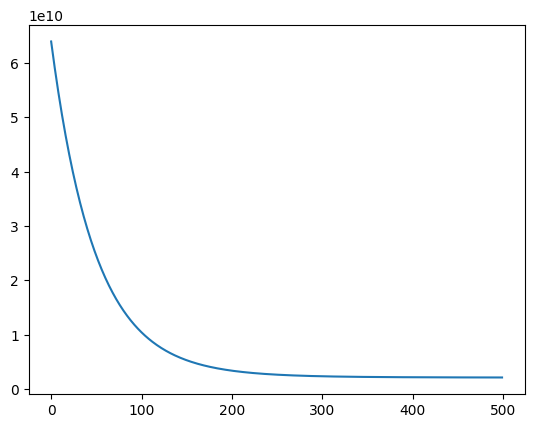

In [ ]:
theta_array=training(X2[:,0:1],X2[:,1:2],Y2,alpha,epochs)

In [ ]:
theta_array

[array([336891.27788331]), array([103774.01694557]), array([208.80691826])]

In [ ]:
hypothesis(theta_array,4,2100)

array([1190481.87401972])